In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movies = pd.read_csv("fandango_score_comparison.csv")

In [3]:
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


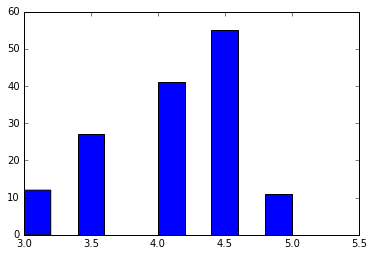

In [4]:
plt.hist(movies["Fandango_Stars"])
plt.show()

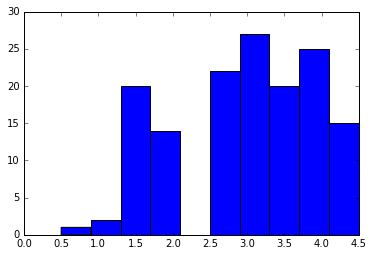

In [5]:
plt.hist(movies["Metacritic_norm_round"])
plt.show()

## observations
Metacritic has some scores below 3, whereas Fandago is only in the 3-5 range

In [6]:
import numpy as np

In [7]:
movies["Fandango_Stars"].describe()

count    146.000000
mean       4.089041
std        0.540386
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [8]:
movies["Metacritic_norm_round"].describe()

count    146.000000
mean       2.972603
std        0.990961
min        0.500000
25%        2.125000
50%        3.000000
75%        4.000000
max        4.500000
Name: Metacritic_norm_round, dtype: float64

In [9]:
movies["Fandango_Stars"].median()

4.0

In [10]:
movies["Metacritic_norm_round"].median()

3.0

In [11]:
# pandas uses "unbiased" std dev by default which we can calc with ddof=1
np.std(movies["Fandango_Stars"], ddof=1)

0.54038597797873344

In [12]:
# pandas uses "unbiased" std dev by default which we can calc with ddof=1
np.std(movies["Metacritic_norm_round"], ddof=1)

0.99096056137433586

## Methodology -- Metacritic
from: http://www.metacritic.com/faq#item11
Uses a weighted average of normalized scores from movie reviews in publications. More prestigious publications are weighted higher. The goal is to normalize for an average review being 50 (on a scale of 0-100).

## Methodology -- Fandango
from http://fandango.custhelp.com/app/answers/new_detail/a_id/881/kw/scores
Uses a simple (non weighted) average of user scores which are on a 1-10 scale. The fact that it's not weighted and does not come from publications probably accounts for the overall higher scores.

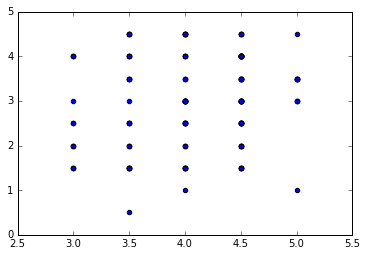

In [13]:
plt.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"])

In [14]:
movies["fm_diff"] = movies["Metacritic_norm_round"] - movies["Fandango_Stars"]

In [15]:
movies["fm_diff"].head()

0   -1.5
1   -1.5
2   -2.0
3   -4.0
4   -2.0
Name: fm_diff, dtype: float64

In [16]:
movies["fm_diff"] = movies["fm_diff"].abs()

In [17]:
movies["fm_diff"].head()

0    1.5
1    1.5
2    2.0
3    4.0
4    2.0
Name: fm_diff, dtype: float64

In [18]:
movies.sort_values("fm_diff", ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [19]:
from scipy import stats

In [20]:
r_val, p_val = stats.pearsonr(movies["Fandango_Stars"], 
                              movies["Metacritic_norm_round"])

In [21]:
r_val

0.17844919073895918

## low correlation between Fandango and Metacritic
This means that the values in these two series are not very linearly related. When one value goes up, the other doesn't necessarily move in the same direction or by a similar amount.

In [22]:
# linear regression predicting fandango from metacritic
slope, intercept, r_val, p_val, std_err = \
    stats.linregress(movies["Metacritic_norm_round"], 
                     movies["Fandango_Stars"])

In [23]:
# formula: y = mx + b
hypothetical_metacritic = 3.0
predicted_fandango_3 = slope * hypothetical_metacritic + intercept

In [24]:
predicted_fandango_3

4.0917071528212032

In [25]:
hypothetical_metacritic = 4.0
predicted_fandango_4 = slope * hypothetical_metacritic + intercept

In [26]:
predicted_fandango_4

4.1890182307951322

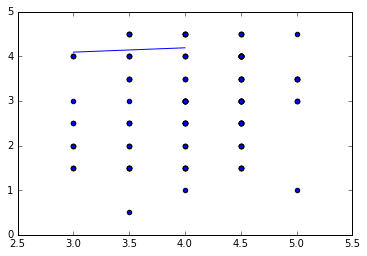

In [27]:
plt.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"])

plt.plot([3.0, 4.0], [predicted_fandango_3, predicted_fandango_4])

plt.show()